# Examining the Mushroom dataset from Kaggle

In [25]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [56]:
# Read in csv file of mushroom data
mushrooms = pd.read_csv('/mnt/c/Users/DeWayne Halfen/Documents/Data Science/DataSets/mushrooms.csv')

In [27]:
# Examine data structure
mushrooms.head()
# p = poisonous, e = edible

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [28]:
# Examine data structure
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [29]:
# Convert '?' to NaN
mushrooms[mushrooms == '?'] = np.nan

# Print the number of NaNs
print(mushrooms.isnull().sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [10]:
# Convert characters to integers using factorize
# In class column: p = 0, e = 1
char_cols = mushrooms.dtypes.pipe(lambda x: x[x == 'object']).index
for c in char_cols:
    mushrooms[c] = pd.factorize(mushrooms[c])[0]
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [ ]:
#_, b = pd.factorize(mushrooms.values.ravel('F'))
#mushnum = mushrooms.apply(lambda x: pd.Categorical(x, b).codes)
#mushnum.head()

In [11]:
features = mushrooms.iloc[:, 1:]
features.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [1, 0, 2, ..., 1, 1, 2],
       ...,
       [3, 0, 0, ..., 8, 5, 6],
       [4, 1, 0, ..., 4, 3, 6],
       [0, 0, 0, ..., 6, 5, 6]])

In [13]:
feature_list = list(features)
feature_list

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

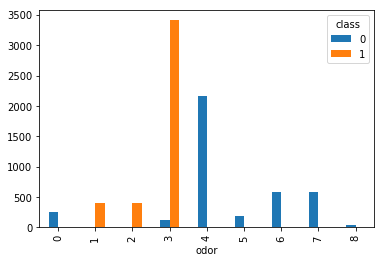

In [14]:
pd.crosstab(mushrooms['odor'], mushrooms['class']).plot(kind='bar')
plt.show()

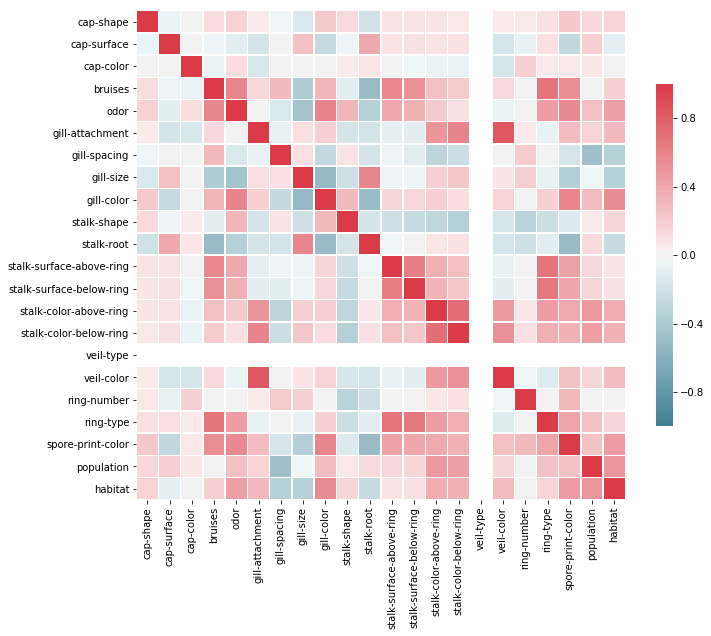

In [15]:
# Compute the correlation matrix
corr = mushrooms.iloc[:, 1:].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax = 1.0, vmin = -1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.7})
plt.show()

# Not much correlaton between features

In [16]:
#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(mushrooms.iloc[:, 1:].values, mushrooms['class'].values, test_size=0.3, random_state=42)

In [17]:
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))

Number of observations in the training data: 5686
Number of observations in the test data: 2438


In [40]:
# Perform Random Forest model on data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [41]:
# Examine results from RFC
# Calculate confusion matrix on test data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix)

[[1181    0]
 [   0 1257]]


In [42]:
# Calculate Classification Report on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1181
          1       1.00      1.00      1.00      1257

avg / total       1.00      1.00      1.00      2438



In [43]:
rfc.score(X_test, y_test)

1.0

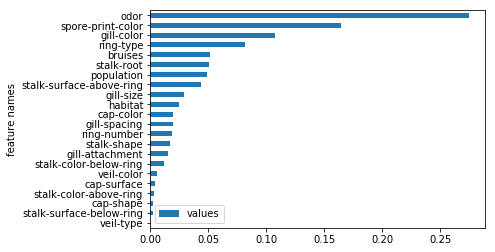

In [21]:
# Plot most important features in RFC model
feature_importances = pd.DataFrame({'feature names': feature_list, 
                                    'values': rfc.feature_importances_})
feature_importances.sort_values(by='values', ascending=True, inplace=True)
feature_importances.index = feature_importances['feature names']
feature_importances.plot.barh()
plt.show()

In [30]:
# Perform Decision Tree mode on training data
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

In [12]:
# Define class names for Decision Tree flow chart
names = ['p','e']
names

['p', 'e']

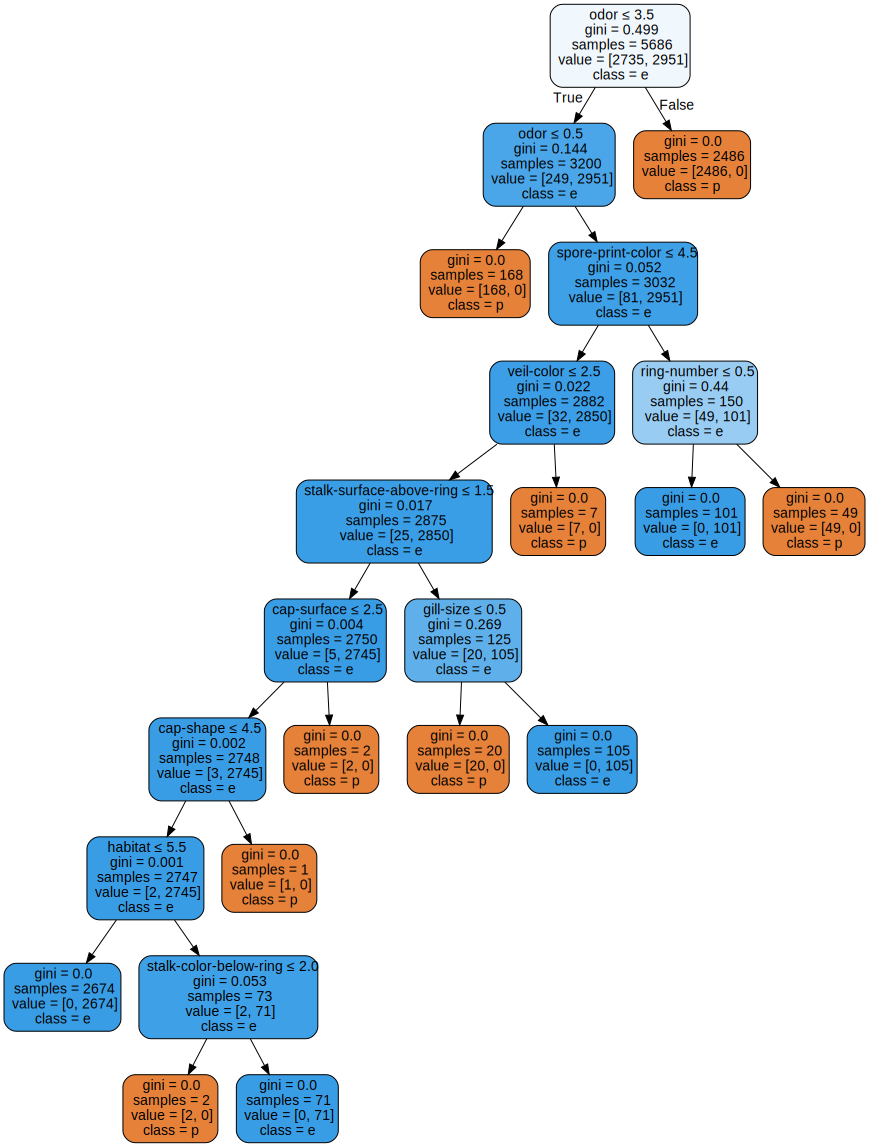

In [33]:
# Plot Decision Tree flow chart
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=feature_list,  
                     class_names=names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [52]:
# Examine results from Decision Tree model
# Calculate confusion matrix on test data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_clf)
print(confusion_matrix)

[[1181    0]
 [   0 1257]]


In [53]:
# Calculate Classification Report on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_clf))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1181
          1       1.00      1.00      1.00      1257

avg / total       1.00      1.00      1.00      2438



In [44]:
# Perform Logistic Regression on Training data, using 5-fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
# Used to find best value of C hyperparameter (default value is 1) and best regression penalty (l1 or l2)
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
# 5-fold cross validation
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 3.727593720314938, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 1.0


In [47]:
# Validate the model using test data
y_pred_logreg_cv = logreg_cv.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_cv.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [48]:
# Examine results from Logistic Regression model
# Calculate confusion matrix on test data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_logreg_cv)
print(confusion_matrix)

[[1181    0]
 [   0 1257]]


In [49]:
# Calculate Classification Report on test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg_cv))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1181
          1       1.00      1.00      1.00      1257

avg / total       1.00      1.00      1.00      2438



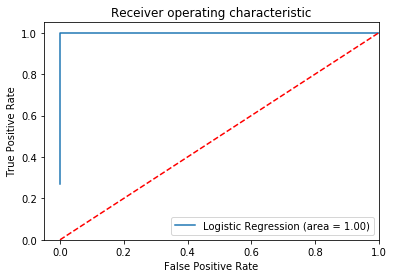

In [51]:
# Calculate the ROC curve for Logistic Regressioin Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_cv.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Conclusion: All models predict test data with perfect accuracy.  The Logistic Regression needed to have the hyperparameter tuned to achieve this.  The Random Forest and Decision Tree model show that the odor is the most important feature in determining whether a mushroom is edible or poisonous.